##### Getting data

In [17]:
file = open('C:/Users/hp/Documents/GitHub/RSA-DS/Introduction to Data Science/Descriptive Stats/adult.data', 'r')

In [18]:
####defining funtion to convert charcter to integer

def chr_int(a):
    if a.isdigit():
        return int(a)
    else:
        return 0

##reading data by line
data=[]
for line in file:
    data1=line.split(', ')
    if len(data1)==15:
        data.append([chr_int(data1[0]),data1[1],chr_int(data1[2]),data1[3],chr_int(data1[4]),data1[5],data1[6],\
        data1[7],data1[8],data1[9],chr_int(data1[10]),chr_int(data1[11]),chr_int(data1[12]),data1[13],\
        data1[14]])

In [19]:
print (data[1:2])

[[50, 'Self-emp-not-inc', 83311, 'Bachelors', 13, 'Married-civ-spouse', 'Exec-managerial', 'Husband', 'White', 'Male', 0, 0, 13, 'United-States', '<=50K\n']]


In [20]:
###converting to pandas df
%matplotlib inline
import pandas as pd

df = pd.DataFrame(data) #  Two-dimensional size-mutable, potentially heterogeneous tabular data structure with labeled axes 

df.columns = ['age', 'type_employer', 'fnlwgt', 'education', 
                "education_num","marital", "occupation", "relationship", "race","sex",
                "capital_gain", "capital_loss", "hr_per_week","country","income"]
df.head()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K\n
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K\n
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K\n
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K\n
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K\n


In [21]:
df.tail()

,age,type_employer,fnlwgt,education,education_num,marital,occupation,relationship,race,sex,capital_gain,capital_loss,hr_per_week,country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K\n
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K\n
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K\n
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K\n
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K\n


In [23]:
df.shape

(32561, 15)

In [28]:
###group by country


counts = df.groupby('country').size()


print (counts) 

country
?                               583
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua           

In [30]:
 ###grouping by age
counts = df.groupby('age').size()
print (counts)

age
17    395
18    550
19    712
20    753
21    720
     ... 
85      3
86      1
87      1
88      3
90     43
Length: 73, dtype: int64


In [32]:
##subset for males
ml = df[(df.sex == 'Male')]

ml.shape

(21790, 15)

In [33]:
##subset for males with high income
ml1 = df[(df.sex == 'Male')&(df.income=='>50K\n')]
ml1.shape

(6662, 15)

In [35]:
##subset for females

fm =df[(df.sex == 'Female')]
fm.shape

(10771, 15)

In [36]:
fm1 = df[(df.sex == 'Female') & (df.income == '>50K\n')]
fm1.shape

(1179, 15)

In [37]:
#all people with above 50k annual income

df1 = df[(df.income == '>50K\n')]

In [39]:
##some summaries

print ('The rate of people with high income is: ', int(len(df1)/float(len(df))*100), '%.') 
print ('The rate of men with high income is: ', int(len(ml1)/float(len(ml))*100), '%.') 
print ('The rate of women with high income is: ', int(len(fm1)/float(len(fm))*100), '%.')

The rate of people with high income is:  24 %.
The rate of men with high income is:  30 %.
The rate of women with high income is:  10 %.


### some exploratory analysis

In [42]:
###Sample mean

print ( 'the average age of men is: ', ml['age'].mean())
print ( 'the average age of women is: ', fm['age'].mean())

the average age of men is:  39.43354749885268
the average age of women is:  36.85823043357163


In [43]:
print ('The average age of high-income men is: ', ml1['age'].mean())
print ('The average age of high-income women is: ', fm1['age'].mean())

The average age of high-income men is:  44.62578805163614
The average age of high-income women is:  42.125530110262936


In [44]:
# mean - variance - standard deviation
ml_mu = ml['age'].mean()
fm_mu = fm['age'].mean()
ml_var = ml['age'].var()
fm_var = fm['age'].var()
ml_std = ml['age'].std()
fm_std = fm['age'].std()
print ('men mu:', ml_mu, 'var:', ml_var, 'std:', ml_std)
print ('women: mu:', fm_mu, 'var:', fm_var, 'std:', fm_std)

men mu: 39.43354749885268 var: 178.77375174530096 std: 13.37063019252649
women: mu: 36.85823043357163 var: 196.3837063948037 std: 14.01369709943824


In [45]:
# data with outliers can give misleading averages

ml_median= ml['age'].median()
fm_median= fm['age'].median()
print ("Median age per men and women: ", ml_median, fm_median)

ml_median_age= ml1['age'].median()
fm_median_age= fm1['age'].median()
print ("Median age per men and women with high-income: ", ml_median_age, fm_median_age)

Median age per men and women:  38.0 35.0
Median age per men and women with high-income:  44.0 41.0


In [46]:
# do they work the same number of hours


ml_mu_hr = ml['hr_per_week'].mean()
fm_mu_hr = fm['hr_per_week'].mean()

ml_median_hr = ml['hr_per_week'].median()
fm_median_hr = fm['hr_per_week'].median()

print(' men mu:', ml_mu_hr, 'median:', ml_median_hr)
print('fm mu:', fm_mu_hr, 'median:', fm_median_hr)

 men mu: 42.42808627810923 median: 40.0
fm mu: 36.410361154953115 median: 40.0


#### looking at distributions

<function matplotlib.pyplot.show(close=None, block=None)>

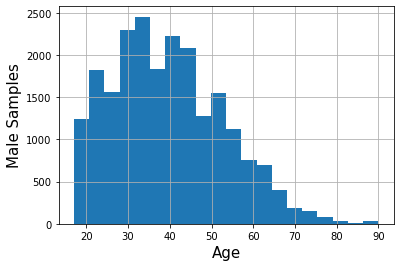

In [50]:
import matplotlib.pyplot as plt

ml_age = ml['age']
ml_age.hist(density=0,histtype='stepfilled', bins = 20)

plt.xlabel('Age',fontsize =15)
plt.ylabel('Male Samples', fontsize=15)
plt.show



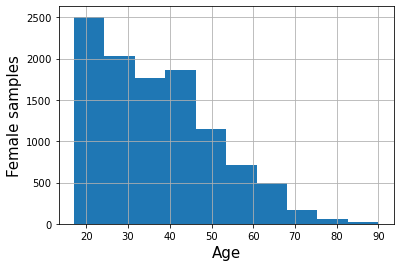

In [51]:
fm_age=fm['age']

fm_age.hist(density=0, histtype='stepfilled', bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Female samples',fontsize=15)
plt.show()

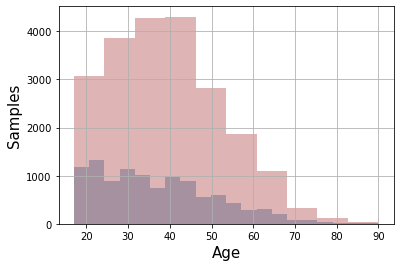

In [52]:

import seaborn as sns
fm_age.hist(density=0, histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
ml_age.hist(density=0, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Samples',fontsize=15)
plt.show()

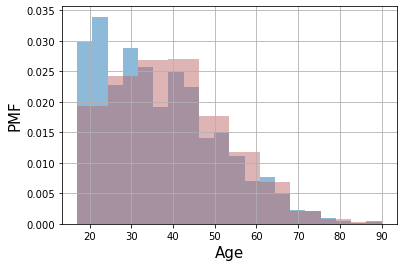

In [53]:

fm_age.hist(density=1, histtype='stepfilled', alpha=.5, bins=20)   # default number of bins = 10
ml_age.hist(density=1, histtype='stepfilled', alpha=.5, color=sns.desaturate("indianred", .75), bins=10)
plt.xlabel('Age',fontsize=15)
plt.ylabel('PMF',fontsize=15)
plt.show()

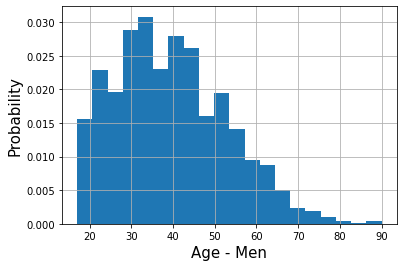

In [55]:
# normalising the data

ml_age.hist(density=1, histtype='stepfilled', bins=20)
plt.xlabel('Age - Men',fontsize=15)
plt.ylabel('Probability',fontsize=15)
plt.show()

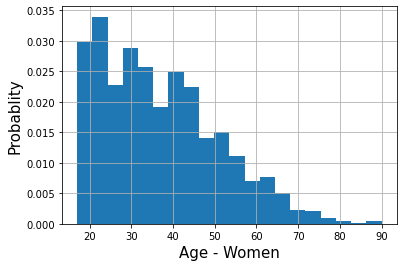

In [58]:
fm_age.hist(density=1,histtype='stepfilled',bins=20)
plt.xlabel('Age - Women',fontsize=15)
plt.ylabel('Probablity',fontsize = 15)
plt.show()

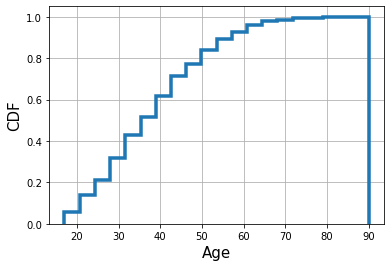

In [59]:
#cdf - cumulative density function


ml_age.hist(density=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

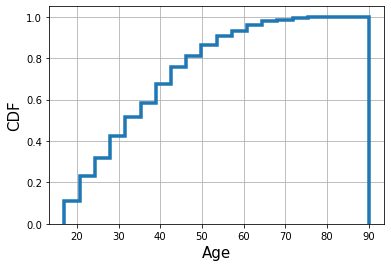

In [60]:
fm_age.hist(density=1, histtype='step', cumulative=True, linewidth=3.5, bins=20)
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()

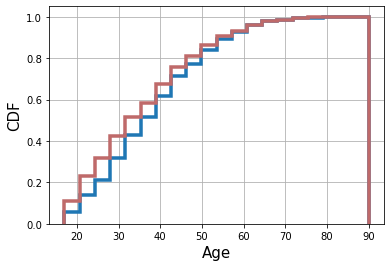

In [61]:
ml_age.hist(density=1, histtype='step', cumulative=True,  linewidth=3.5, bins=20)
fm_age.hist(density=1, histtype='step', cumulative=True,  linewidth=3.5, bins=20, color=sns.desaturate("indianred", .75))
plt.xlabel('Age',fontsize=15)
plt.ylabel('CDF',fontsize=15)
plt.show()